In [32]:
from pylab import *
from scipy.integrate import *

In [33]:
def RK4(f , t_intervalo , y0 , delta=0.01):
    t = arange(t_intervalo[0],t_intervalo[1]+delta,delta)
    sol = zeros((len(y0),len(t)))
    sol[:,0] = y0
    for i in range(len(t)-1):
        k1 = f( t[i] , sol[:,i] )
        k2 = f( t[i] + 0.5*delta , sol[:,i] + 0.5*delta*k1 )
        k3 = f( t[i] + 0.5*delta , sol[:,i] + 0.5*delta*k2 )
        k4 = f( t[i] + delta , sol[:,i] + delta*k3 )
        sol[:,i+1] = sol[:,i] + (delta/6)*(k1 + 2*k2 + 2*k3 + k4)
    return (t,sol)

def mov_planet(t,x):
    # x es x,y,vx,vy
    dx = x[2]
    dy = x[3]
    d32xy = (x[0]**2 + x[1]**2)**1.5
    dvx = -x[0]/d32xy
    dvy = -x[1]/d32xy
    return array([ dx , dy , dvx , dvy ]) 

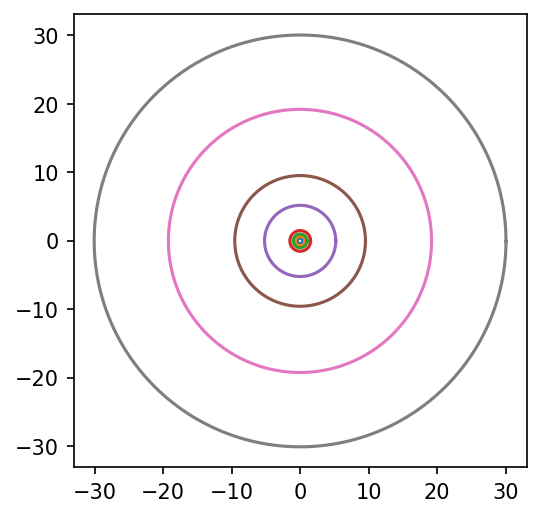

In [34]:
dist_p=[0.39,0.72,1.0,1.52,5.2,9.54,19.19,30.06]
per_p=[0.24,0.615,1.0,1.88,11.86,29.46,84.01,164.79]
figure(dpi=150)
for i in range(len(dist_p)):
    ci=[dist_p[i],0,0,dist_p[i]/per_p[i]]
    tray_p=RK4(mov_planet,(0,2*pi*per_p[i]),ci)
    plot(tray_p[1][0],tray_p[1][1])
gca().set_aspect('equal')
show()


In [50]:
yr=100
i=2
ci=[dist_p[i],0,0,dist_p[i]/per_p[i]]
tray_p=RK4(mov_planet,(0,2*pi*yr),ci)
datos=zeros((len(tray_p[0]),2,2))
datos[:,0,0],datos[:,1,0]=tray_p[1][0],tray_p[1][1]
i=3
ci=[dist_p[i],0,0,dist_p[i]/per_p[i]]
tray_p=RK4(mov_planet,(0,2*pi*yr),ci)
datos[:,0,1],datos[:,1,1]=tray_p[1][0],tray_p[1][1]
datos

array([[[ 1.00000000e+00,  1.52000000e+00],
        [ 0.00000000e+00,  0.00000000e+00]],

       [[ 9.99950000e-01,  1.51997836e+00],
        [ 9.99983333e-03,  8.08506801e-03]],

       [[ 9.99800007e-01,  1.51991344e+00],
        [ 1.99986667e-02,  1.61699058e-02]],

       ...,

       [[ 9.99828327e-01,  1.07023772e+00],
        [-1.85286912e-02, -1.07529521e+00]],

       [[ 9.99963620e-01,  1.07598973e+00],
        [-8.52964808e-03, -1.06959162e+00]],

       [[ 9.99998917e-01,  1.08171093e+00],
        [ 1.47024797e-03, -1.06385741e+00]]])

1.6783340125988568


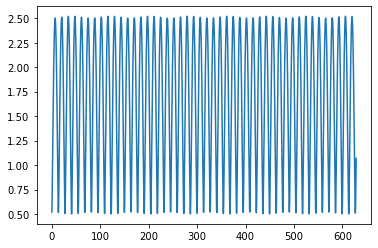

In [51]:
dist_ab=sqrt((datos[:,0,0]-datos[:,0,1])**2+(datos[:,1,0]-datos[:,1,1])**2)
plot(tray_p[0],dist_ab)
print(simpson(dist_ab,tray_p[0]/(2*pi*yr)))
show()

In [62]:
def dist_planeta_Tierra(dist_p,per_p,ciclos=10):
    yr=per_p*ciclos#tiempo de simulación
    #Referencia de la tierra
    ci=[1,0,0,1]
    tray_p=RK4(mov_planet,(0,2*pi*yr),ci)
    datos=zeros((len(tray_p[0]),2,2)) #variable para guardar los datos
    datos[:,0,0],datos[:,1,0]=tray_p[1][0],tray_p[1][1]
    #simulación del planeta
    ci=[dist_p,0,0,dist_p/per_p]
    tray_p=RK4(mov_planet,(0,2*pi*yr),ci)
    datos[:,0,1],datos[:,1,1]=tray_p[1][0],tray_p[1][1]
    dist_ab=sqrt((datos[:,0,0]-datos[:,0,1])**2+(datos[:,1,0]-datos[:,1,1])**2)
    tiempo_p=simpson(dist_ab,tray_p[0]/(2*pi*yr))  
    
    return tiempo_p

In [ ]:
D_planeta=[0.39,0.72,1.0,1.52,5.2,9.54,19.19,30.06]
T_planeta=[0.24,0.615,1.0,1.88,11.86,29.46,84.01,164.79]
nombre=['Mercurio','Venus','Tierra','Marte','Júpiter','Saturno','Urano','Neptuno']
for i in range(len(nombre)):
    print('Distancia Tierra-',nombre[i],'=',dist_planeta_Tierra(D_planeta[i],T_planeta[i],100),'años')

Distancia Tierra- Mercurio = 1.0401057214661833 años
Distancia Tierra- Venus = 1.128573156423093 años
Distancia Tierra- Tierra = 0.0 años
Distancia Tierra- Marte = 1.6826523154636723 años
Distancia Tierra- Júpiter = 5.246370811113233 años
Distancia Tierra- Saturno = 9.570139493164621 años
Distancia Tierra- Urano = 19.227973262235512 años
